In [5]:
from typing_extensions import TypedDict

class State(TypedDict):
    info:str

In [6]:
def planning(state:State):
    print("The Planning Node has Been Called...")
    return {"info":state["info"]+ " I Want Start Playing Games"}


def start_play(state:State):
    print("The Start Play Node has Been Called")
    return {"info":state["info"]+ " He Has Started to Playing"}


def cricket(state:State):
    print("The Cricket Node has Been Called...")
    return {"info":state["info"]+ " I Want Start Playing Cricket"}


def badmiton(state:State):
    print("The Start Play Node has Been Called")
    return {"info":state["info"]+ " He Has Started to Badmiton"}


    

# Logic

### Implement the logic he wants to play either Cricket or Badmiton

In [12]:
import random
from typing import Literal

def decides(state:State)-> Literal["cricket","badmiton"]:
    info = state["info"]
    
    if random.random()>0.5:
        return "cricket"
    else:
        return "badmiton"    
 

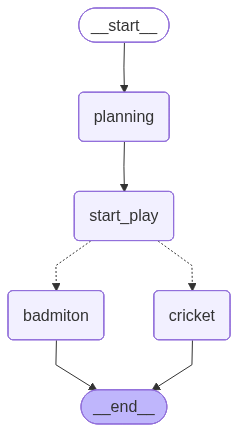

In [13]:
# Build a Graph

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

#Add Nodes
graph.add_node("planning",planning)
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badmiton",badmiton)

#Add Edges
graph.add_edge(START,"planning")
graph.add_edge("planning","start_play")
graph.add_conditional_edges("start_play",decides)
graph.add_edge("cricket",END)
graph.add_edge("badmiton",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [38]:
graph_builder.invoke({"info":"My Name is Husen"})

The Planning Node has Been Called...
The Start Play Node has Been Called
The Start Play Node has Been Called


{'info': 'My Name is Husen I Want Start Playing Games He Has Started to Playing He Has Started to Badmiton'}